# importing libraries:

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

# get the data

In [2]:
data = pd.read_csv(r"C:\Users\Ankita\Desktop\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# columns are

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# get some information about data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

# cabin columns has more approx 77% missing data ,so we can drop this column......

In [6]:
data= data.drop("Cabin",axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# handling missing values

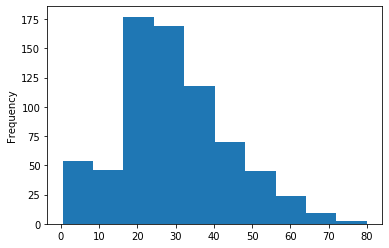

In [7]:
data["Age"].plot.hist()

### As the graph is bellshaped so we can use mean to fill the missing value

In [8]:

data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# most people are from "s-southampton" so this is the mode of the col embarked so we can fill the null value with it...


In [9]:
data["Embarked"].mode()

0    S
dtype: object

In [10]:
data["Embarked"].fillna(value='S',inplace= True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
data.drop(["PassengerId","Name",'Ticket'],axis=1,inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# coversion of categorical value into in integer values using label encoder.....


In [13]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [14]:
data["Sex"]= le.fit_transform(data['Sex'])
data["Embarked"] = le.fit_transform(data["Embarked"])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# KNN(k-nearest neighbour)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [21]:
def prediction(n):
    x = data.drop(['Survived'],axis=1)
    y = data['Survived']
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()

Enter The number of iteration you want for k: 268
--------------------------------------------------------------------------------------
Here k value is 1: 

Acuuracy when k is 1  0.6716417910447762
Confusion matrix when k is 1  
 [[125  43]
 [ 45  55]]
--------------------------------------------------------------------------------------
Here k value is 2: 

Acuuracy when k is 2  0.7089552238805971
Confusion matrix when k is 2  
 [[155  13]
 [ 65  35]]
--------------------------------------------------------------------------------------
Here k value is 3: 

Acuuracy when k is 3  0.6940298507462687
Confusion matrix when k is 3  
 [[133  35]
 [ 47  53]]
--------------------------------------------------------------------------------------
Here k value is 4: 

Acuuracy when k is 4  0.7052238805970149
Confusion matrix when k is 4  
 [[150  18]
 [ 61  39]]
--------------------------------------------------------------------------------------
Here k value is 5: 

Acuuracy when k is 5  0.72


Acuuracy when k is 42  0.7276119402985075
Confusion matrix when k is 42  
 [[152  16]
 [ 57  43]]
--------------------------------------------------------------------------------------
Here k value is 43: 

Acuuracy when k is 43  0.7388059701492538
Confusion matrix when k is 43  
 [[151  17]
 [ 53  47]]
--------------------------------------------------------------------------------------
Here k value is 44: 

Acuuracy when k is 44  0.7388059701492538
Confusion matrix when k is 44  
 [[152  16]
 [ 54  46]]
--------------------------------------------------------------------------------------
Here k value is 45: 

Acuuracy when k is 45  0.7425373134328358
Confusion matrix when k is 45  
 [[149  19]
 [ 50  50]]
--------------------------------------------------------------------------------------
Here k value is 46: 

Acuuracy when k is 46  0.7350746268656716
Confusion matrix when k is 46  
 [[150  18]
 [ 53  47]]
-------------------------------------------------------------------------


Acuuracy when k is 82  0.7089552238805971
Confusion matrix when k is 82  
 [[154  14]
 [ 64  36]]
--------------------------------------------------------------------------------------
Here k value is 83: 

Acuuracy when k is 83  0.7164179104477612
Confusion matrix when k is 83  
 [[154  14]
 [ 62  38]]
--------------------------------------------------------------------------------------
Here k value is 84: 

Acuuracy when k is 84  0.7089552238805971
Confusion matrix when k is 84  
 [[154  14]
 [ 64  36]]
--------------------------------------------------------------------------------------
Here k value is 85: 

Acuuracy when k is 85  0.7126865671641791
Confusion matrix when k is 85  
 [[154  14]
 [ 63  37]]
--------------------------------------------------------------------------------------
Here k value is 86: 

Acuuracy when k is 86  0.7089552238805971
Confusion matrix when k is 86  
 [[154  14]
 [ 64  36]]
-------------------------------------------------------------------------


Acuuracy when k is 122  0.7052238805970149
Confusion matrix when k is 122  
 [[159   9]
 [ 70  30]]
--------------------------------------------------------------------------------------
Here k value is 123: 

Acuuracy when k is 123  0.7052238805970149
Confusion matrix when k is 123  
 [[158  10]
 [ 69  31]]
--------------------------------------------------------------------------------------
Here k value is 124: 

Acuuracy when k is 124  0.7014925373134329
Confusion matrix when k is 124  
 [[158  10]
 [ 70  30]]
--------------------------------------------------------------------------------------
Here k value is 125: 

Acuuracy when k is 125  0.7089552238805971
Confusion matrix when k is 125  
 [[158  10]
 [ 68  32]]
--------------------------------------------------------------------------------------
Here k value is 126: 

Acuuracy when k is 126  0.7014925373134329
Confusion matrix when k is 126  
 [[158  10]
 [ 70  30]]
-----------------------------------------------------------


Acuuracy when k is 162  0.7014925373134329
Confusion matrix when k is 162  
 [[159   9]
 [ 71  29]]
--------------------------------------------------------------------------------------
Here k value is 163: 

Acuuracy when k is 163  0.7089552238805971
Confusion matrix when k is 163  
 [[159   9]
 [ 69  31]]
--------------------------------------------------------------------------------------
Here k value is 164: 

Acuuracy when k is 164  0.7014925373134329
Confusion matrix when k is 164  
 [[160   8]
 [ 72  28]]
--------------------------------------------------------------------------------------
Here k value is 165: 

Acuuracy when k is 165  0.7014925373134329
Confusion matrix when k is 165  
 [[160   8]
 [ 72  28]]
--------------------------------------------------------------------------------------
Here k value is 166: 

Acuuracy when k is 166  0.7014925373134329
Confusion matrix when k is 166  
 [[160   8]
 [ 72  28]]
-----------------------------------------------------------


Acuuracy when k is 202  0.7014925373134329
Confusion matrix when k is 202  
 [[161   7]
 [ 73  27]]
--------------------------------------------------------------------------------------
Here k value is 203: 

Acuuracy when k is 203  0.7014925373134329
Confusion matrix when k is 203  
 [[161   7]
 [ 73  27]]
--------------------------------------------------------------------------------------
Here k value is 204: 

Acuuracy when k is 204  0.7014925373134329
Confusion matrix when k is 204  
 [[161   7]
 [ 73  27]]
--------------------------------------------------------------------------------------
Here k value is 205: 

Acuuracy when k is 205  0.7014925373134329
Confusion matrix when k is 205  
 [[161   7]
 [ 73  27]]
--------------------------------------------------------------------------------------
Here k value is 206: 

Acuuracy when k is 206  0.7014925373134329
Confusion matrix when k is 206  
 [[161   7]
 [ 73  27]]
-----------------------------------------------------------


Acuuracy when k is 242  0.6940298507462687
Confusion matrix when k is 242  
 [[161   7]
 [ 75  25]]
--------------------------------------------------------------------------------------
Here k value is 243: 

Acuuracy when k is 243  0.6977611940298507
Confusion matrix when k is 243  
 [[161   7]
 [ 74  26]]
--------------------------------------------------------------------------------------
Here k value is 244: 

Acuuracy when k is 244  0.6902985074626866
Confusion matrix when k is 244  
 [[161   7]
 [ 76  24]]
--------------------------------------------------------------------------------------
Here k value is 245: 

Acuuracy when k is 245  0.6940298507462687
Confusion matrix when k is 245  
 [[161   7]
 [ 75  25]]
--------------------------------------------------------------------------------------
Here k value is 246: 

Acuuracy when k is 246  0.6902985074626866
Confusion matrix when k is 246  
 [[161   7]
 [ 76  24]]
-----------------------------------------------------------

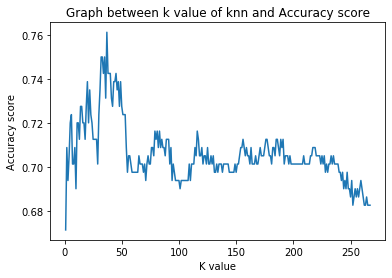

In [22]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)

# Conclusion:
* When the k value is 1 , It gives highest accuracy : 0.8544 (but it overfits the data)
* When the k value is 5 , It gives same accuracy as that for k=1 : 0.8544
* After k=5 , the accuracy decreases
* So, K = 5 is the best k for this model